In [1]:
import numpy as np
import scipy.io as io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
tf.random.set_seed(100)

In [3]:
#load data from mat
train = io.loadmat('train_32x32.mat')
test = io.loadmat('test_32x32.mat')

In [4]:
#creating training and testing sets 
train_images = train['X']
train_target = train['y']
test_images = test['X']
test_target = test['y']

In [5]:
#check dimensions
#print(train_images.shape)
#print(train_target.shape)
#print(test_images.shape)
#print(test_target.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [ ]:
#visualize the first 24 images in gray scale
#plt.figure(figsize = (10,10))
#for i in range(25):
#    plt.subplot(5,5, i+1)
#    plt.xticks([])
#    plt.yticks([])
#    a=cv.cvtColor(train_images[:,:,:,i], cv.COLOR_RGB2GRAY)
#    plt.imshow(cv.equalizeHist(a),cmap='gray')
#plt.show()

In [6]:
#make the matching labels from 0 to 9
train_target[train_target==10]=0
test_target[test_target==10]=0

In [7]:
#Prepare the dataset, converting them to gray images and reshape, histogram equalization to enhance constract
x_train = []
x_test = []
for i in range(73257):
    grays =cv.cvtColor(train_images[:,:,:,i], cv.COLOR_RGB2GRAY)
    grays = cv.equalizeHist(grays)    
    x_train.append(grays)
    
for i in range(26032):
    grays =cv.cvtColor(test_images[:,:,:,i], cv.COLOR_RGB2GRAY)
    grays = cv.equalizeHist(grays)
    x_test.append(grays)
    
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
#test_target[:6000].shape
#x_test[:6000].shape

In [8]:
#reshape the data
x_train = x_train.reshape(73257,32,32,1)
x_test = x_test.reshape(26032,32,32,1)

In [9]:
#change them to one-hot
train_target = keras.utils.to_categorical(train_target)
test_target = keras.utils.to_categorical(test_target)

In [10]:
#test_target.shape
#x_test.shape

(26032, 32, 32, 1)

In [22]:
###starting model###
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 37s 16ms/step - loss: 1.0927 - accuracy: 0.7270 - val_loss: 0.7616 - val_accuracy: 0.7734
Epoch 2/50
2290/2290 [==============================] - 38s 17ms/step - loss: 0.5964 - accuracy: 0.8236 - val_loss: 0.6986 - val_accuracy: 0.7959
Epoch 3/50
2290/2290 [==============================] - 35s 15ms/step - loss: 0.5520 - accuracy: 0.8359 - val_loss: 0.7165 - val_accuracy: 0.7884
Epoch 4/50
2290/2290 [==============================] - 35s 15ms/step - loss: 0.5367 - accuracy: 0.8398 - val_loss: 0.6644 - val_accuracy: 0.8022
Epoch 5/50
2290/2290 [==============================] - 38s 17ms/step - loss: 0.5196 - accuracy: 0.8460 - val_loss: 0.6670 - val_accuracy: 0.8056
Epoch 6/50
2290/2290 [==============================] - 41s 18ms/step - loss: 0.5064 - accuracy: 0.8490 - val_loss: 0.7284 - val_accuracy: 0.7851
Epoch 7/50
2290/2290 [==============================] - 37s 16ms/step - loss: 0.4947 - accuracy: 0.8524 - val_loss: 0.6371 -

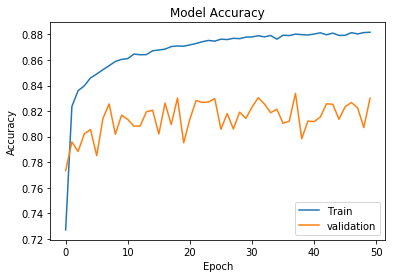

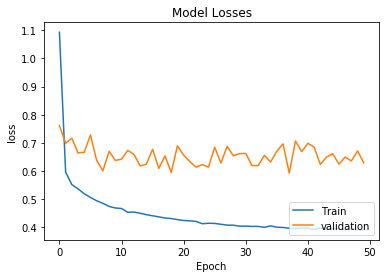

In [28]:
#visualize the accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Initial Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Initial Model Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [29]:
###second model - based on the first model, deleted the first maxpooling layer###
model0 = models.Sequential()
model0.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model0.add(layers.Conv2D(32, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Flatten())
model0.add(layers.Dense(10, activation='softmax'))

In [30]:
model0.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history0 = model0.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=30)

Epoch 1/30
2290/2290 [==============================] - 77s 34ms/step - loss: 1.0692 - accuracy: 0.7488 - val_loss: 0.7787 - val_accuracy: 0.7694
Epoch 2/30
2290/2290 [==============================] - 80s 35ms/step - loss: 0.5902 - accuracy: 0.8251 - val_loss: 0.7744 - val_accuracy: 0.7710
Epoch 3/30
2290/2290 [==============================] - 82s 36ms/step - loss: 0.5444 - accuracy: 0.8384 - val_loss: 0.7941 - val_accuracy: 0.7653
Epoch 4/30
2290/2290 [==============================] - 83s 36ms/step - loss: 0.5047 - accuracy: 0.8488 - val_loss: 0.7579 - val_accuracy: 0.7827
Epoch 5/30
2290/2290 [==============================] - 77s 33ms/step - loss: 0.4654 - accuracy: 0.8615 - val_loss: 0.8027 - val_accuracy: 0.7820
Epoch 6/30
2290/2290 [==============================] - 76s 33ms/step - loss: 0.4356 - accuracy: 0.8693 - val_loss: 0.8143 - val_accuracy: 0.7722
Epoch 7/30
2290/2290 [==============================] - 75s 33ms/step - loss: 0.4087 - accuracy: 0.8754 - val_loss: 0.7731 -

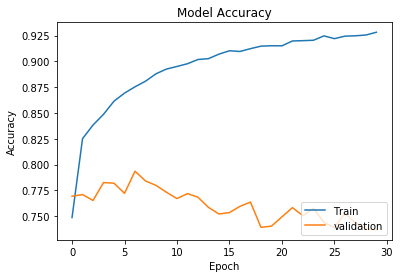

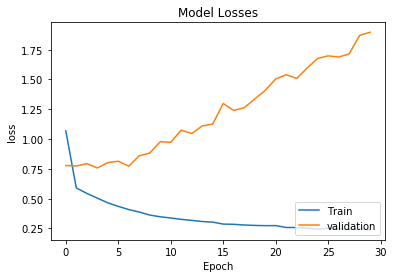

In [31]:
# visualize the accuracy
plt.figure()
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('Model0 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('Model0 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [32]:
#third model- based on the first model impact the acurracy, add fully connected layer
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [33]:
model1.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 72s 31ms/step - loss: 0.9207 - accuracy: 0.7646 - val_loss: 0.6709 - val_accuracy: 0.7969
Epoch 2/50
2290/2290 [==============================] - 73s 32ms/step - loss: 0.4749 - accuracy: 0.8569 - val_loss: 0.6184 - val_accuracy: 0.8148
Epoch 3/50
2290/2290 [==============================] - 71s 31ms/step - loss: 0.4066 - accuracy: 0.8775 - val_loss: 0.5810 - val_accuracy: 0.8294
Epoch 4/50
2290/2290 [==============================] - 69s 30ms/step - loss: 0.3619 - accuracy: 0.8897 - val_loss: 0.5150 - val_accuracy: 0.8508
Epoch 5/50
2290/2290 [==============================] - 61s 27ms/step - loss: 0.3202 - accuracy: 0.9026 - val_loss: 0.5422 - val_accuracy: 0.8457
Epoch 6/50
2290/2290 [==============================] - 59s 26ms/step - loss: 0.2867 - accuracy: 0.9121 - val_loss: 0.5710 - val_accuracy: 0.8362
Epoch 7/50
2290/2290 [==============================] - 59s 26ms/step - loss: 0.2639 - accuracy: 0.9190 - val_loss: 0.5510 -

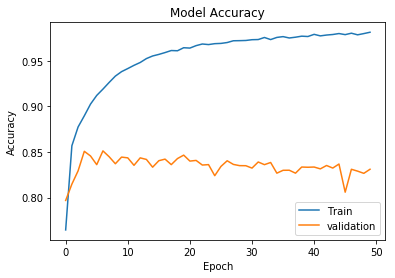

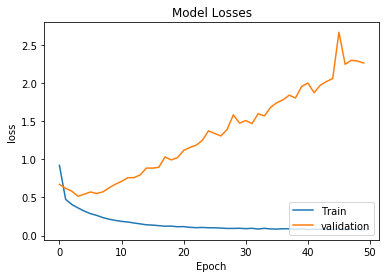

In [35]:
# visualize the accuracy
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model1 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [36]:
###fourth model - add one more convolutional layer###
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [37]:
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 42s 18ms/step - loss: 0.8168 - accuracy: 0.7654 - val_loss: 0.6870 - val_accuracy: 0.7904
Epoch 2/50
2290/2290 [==============================] - 41s 18ms/step - loss: 0.4538 - accuracy: 0.8625 - val_loss: 0.5523 - val_accuracy: 0.8317
Epoch 3/50
2290/2290 [==============================] - 41s 18ms/step - loss: 0.3858 - accuracy: 0.8832 - val_loss: 0.5390 - val_accuracy: 0.8395
Epoch 4/50
2290/2290 [==============================] - 41s 18ms/step - loss: 0.3437 - accuracy: 0.8972 - val_loss: 0.4876 - val_accuracy: 0.8568
Epoch 5/50
2290/2290 [==============================] - 44s 19ms/step - loss: 0.3120 - accuracy: 0.9061 - val_loss: 0.4960 - val_accuracy: 0.8538
Epoch 6/50
2290/2290 [==============================] - 43s 19ms/step - loss: 0.2838 - accuracy: 0.9136 - val_loss: 0.5586 - val_accuracy: 0.8409
Epoch 7/50
2290/2290 [==============================] - 42s 18ms/step - loss: 0.2631 - accuracy: 0.9184 - val_loss: 0.5074 -

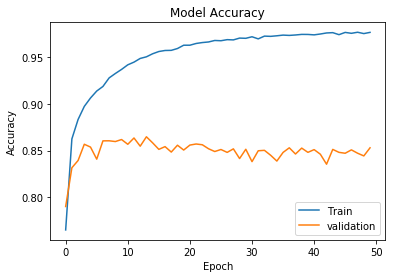

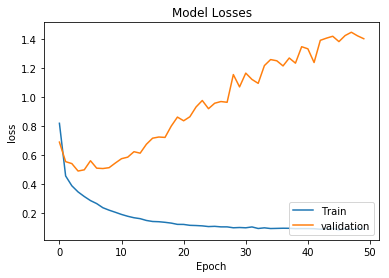

In [38]:
# visualize the accuracy
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [39]:
###fiveth model -dense layer dimension increase from 64 to 128###
model3 = models.Sequential()
model3.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))

model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [40]:
model3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 46s 20ms/step - loss: 0.7468 - accuracy: 0.7819 - val_loss: 0.5873 - val_accuracy: 0.8215
Epoch 2/50
2290/2290 [==============================] - 40s 18ms/step - loss: 0.4324 - accuracy: 0.8698 - val_loss: 0.5332 - val_accuracy: 0.8396
Epoch 3/50
2290/2290 [==============================] - 38s 17ms/step - loss: 0.3709 - accuracy: 0.8882 - val_loss: 0.4764 - val_accuracy: 0.8581
Epoch 4/50
2290/2290 [==============================] - 38s 17ms/step - loss: 0.3304 - accuracy: 0.9008 - val_loss: 0.4601 - val_accuracy: 0.8669
Epoch 5/50
2290/2290 [==============================] - 38s 17ms/step - loss: 0.2926 - accuracy: 0.9111 - val_loss: 0.5000 - val_accuracy: 0.8569
Epoch 6/50
2290/2290 [==============================] - 39s 17ms/step - loss: 0.2603 - accuracy: 0.9213 - val_loss: 0.5183 - val_accuracy: 0.8540
Epoch 7/50
2290/2290 [==============================] - 38s 17ms/step - loss: 0.2336 - accuracy: 0.9288 - val_loss: 0.5259 -

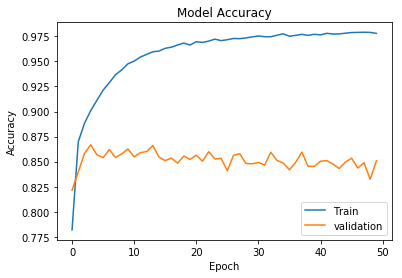

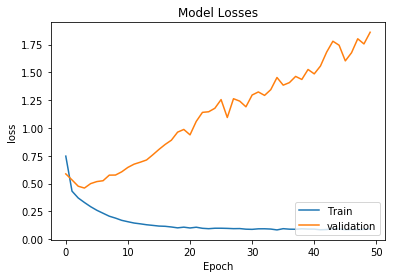

In [42]:
# visualize the accuracy
plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [44]:
###six model  - Add dropout###
model4 = models.Sequential()
model4.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Dropout(0.3))

model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

In [45]:
model4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 45s 20ms/step - loss: 1.0194 - accuracy: 0.6975 - val_loss: 0.5737 - val_accuracy: 0.8272
Epoch 2/50
2290/2290 [==============================] - 43s 19ms/step - loss: 0.5300 - accuracy: 0.8375 - val_loss: 0.5288 - val_accuracy: 0.8395
Epoch 3/50
2290/2290 [==============================] - 43s 19ms/step - loss: 0.4663 - accuracy: 0.8586 - val_loss: 0.4844 - val_accuracy: 0.8564
Epoch 4/50
2290/2290 [==============================] - 44s 19ms/step - loss: 0.4222 - accuracy: 0.8721 - val_loss: 0.4599 - val_accuracy: 0.8644
Epoch 5/50
2290/2290 [==============================] - 44s 19ms/step - loss: 0.3904 - accuracy: 0.8817 - val_loss: 0.4309 - val_accuracy: 0.8749
Epoch 6/50
2290/2290 [==============================] - 43s 19ms/step - loss: 0.3728 - accuracy: 0.8865 - val_loss: 0.4273 - val_accuracy: 0.8762
Epoch 7/50
2290/2290 [==============================] - 43s 19ms/step - loss: 0.3535 - accuracy: 0.8939 - val_loss: 0.4065 -

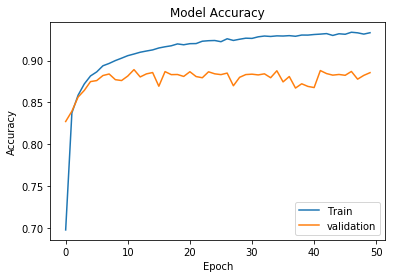

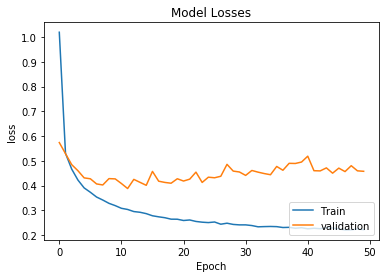

In [48]:
# visualize the accuracy
plt.figure()
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model4 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [49]:
###seventh model  - three dense layer and three convolutional layer###
model5 = models.Sequential()
model5.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(32, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))

model5.add(layers.Flatten())
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

In [50]:
model5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history5 = model5.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 54s 24ms/step - loss: 0.7417 - accuracy: 0.7775 - val_loss: 0.5873 - val_accuracy: 0.8205
Epoch 2/50
2290/2290 [==============================] - 48s 21ms/step - loss: 0.4349 - accuracy: 0.8673 - val_loss: 0.4981 - val_accuracy: 0.8520
Epoch 3/50
2290/2290 [==============================] - 44s 19ms/step - loss: 0.3715 - accuracy: 0.8874 - val_loss: 0.4963 - val_accuracy: 0.8534
Epoch 4/50
2290/2290 [==============================] - 46s 20ms/step - loss: 0.3306 - accuracy: 0.9007 - val_loss: 0.4971 - val_accuracy: 0.8563
Epoch 5/50
2290/2290 [==============================] - 40s 18ms/step - loss: 0.2914 - accuracy: 0.9128 - val_loss: 0.4828 - val_accuracy: 0.8662
Epoch 6/50
2290/2290 [==============================] - 40s 18ms/step - loss: 0.2603 - accuracy: 0.9216 - val_loss: 0.4727 - val_accuracy: 0.8679
Epoch 7/50
2290/2290 [==============================] - 40s 18ms/step - loss: 0.2357 - accuracy: 0.9287 - val_loss: 0.5006 -

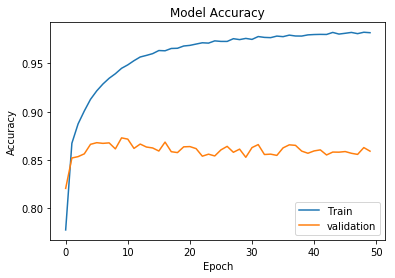

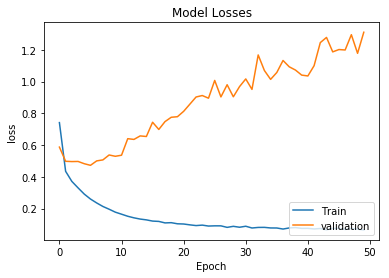

In [51]:
# visualize the accuracy
plt.figure()
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model5 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [52]:
###final model###
model6 = models.Sequential()
model6.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model6.add(layers.BatchNormalization())
model6.add(layers.Conv2D(32, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.Conv2D(32, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(16, (3, 3), activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Dropout(0.3))

model6.add(layers.Flatten())
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))

In [61]:
model6.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 32)      

In [53]:
#final model without setting the learning rate
model6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history6 = model6.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 151s 66ms/step - loss: 0.8866 - accuracy: 0.7148 - val_loss: 0.4729 - val_accuracy: 0.8556
Epoch 2/50
2290/2290 [==============================] - 149s 65ms/step - loss: 0.5107 - accuracy: 0.8457 - val_loss: 0.4428 - val_accuracy: 0.8635
Epoch 3/50
2290/2290 [==============================] - 151s 66ms/step - loss: 0.4437 - accuracy: 0.8690 - val_loss: 0.4671 - val_accuracy: 0.8576
Epoch 4/50
2290/2290 [==============================] - 153s 67ms/step - loss: 0.4047 - accuracy: 0.8809 - val_loss: 0.3683 - val_accuracy: 0.8912
Epoch 5/50
2290/2290 [==============================] - 151s 66ms/step - loss: 0.3776 - accuracy: 0.8888 - val_loss: 0.3480 - val_accuracy: 0.8942
Epoch 6/50
2290/2290 [==============================] - 170s 74ms/step - loss: 0.3567 - accuracy: 0.8940 - val_loss: 0.3571 - val_accuracy: 0.8926
Epoch 7/50
2290/2290 [==============================] - 152s 66ms/step - loss: 0.3458 - accuracy: 0.8989 - val_loss: 0

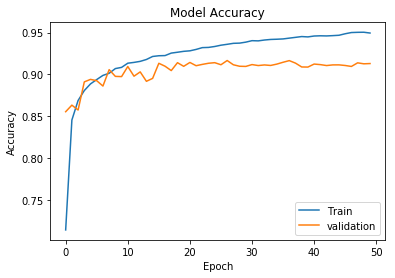

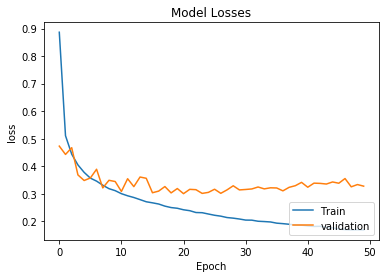

In [55]:
# visualize the accuracy
plt.figure()
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model6 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [56]:
#final model setting the learning rate to be 0.01
opt = keras.optimizers.Adam(learning_rate=0.01)
model6.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# train the model
history7 = model6.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=50)

Epoch 1/50
2290/2290 [==============================] - 158s 69ms/step - loss: 0.4393 - accuracy: 0.8691 - val_loss: 0.5341 - val_accuracy: 0.8337
Epoch 2/50
2290/2290 [==============================] - 156s 68ms/step - loss: 0.4026 - accuracy: 0.8805 - val_loss: 0.4622 - val_accuracy: 0.8609
Epoch 3/50
2290/2290 [==============================] - 148s 65ms/step - loss: 0.3871 - accuracy: 0.8877 - val_loss: 0.3837 - val_accuracy: 0.8879
Epoch 4/50
2290/2290 [==============================] - 159s 70ms/step - loss: 0.3686 - accuracy: 0.8925 - val_loss: 0.4352 - val_accuracy: 0.8738
Epoch 5/50
2290/2290 [==============================] - 154s 67ms/step - loss: 0.3506 - accuracy: 0.8985 - val_loss: 0.4099 - val_accuracy: 0.8825
Epoch 6/50
2290/2290 [==============================] - 153s 67ms/step - loss: 0.3408 - accuracy: 0.9013 - val_loss: 0.3762 - val_accuracy: 0.8939
Epoch 7/50
2290/2290 [==============================] - 155s 68ms/step - loss: 0.3300 - accuracy: 0.9058 - val_loss: 0

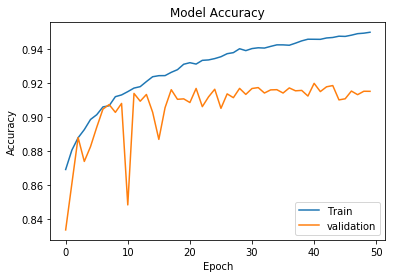

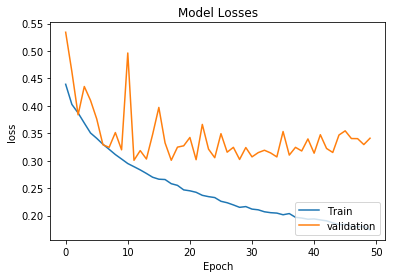

In [60]:
# visualize the accuracy
plt.figure()
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model7 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model7 Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [57]:
#final model setting the learning rate to be 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)
model6.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# train the model
history8 = model6.fit(x_train, train_target, validation_data=(x_test, test_target), epochs=30)

Epoch 1/30
2290/2290 [==============================] - 165s 72ms/step - loss: 0.1332 - accuracy: 0.9627 - val_loss: 0.3226 - val_accuracy: 0.9200
Epoch 2/30
2290/2290 [==============================] - 147s 64ms/step - loss: 0.1209 - accuracy: 0.9666 - val_loss: 0.3276 - val_accuracy: 0.9196
Epoch 3/30
2290/2290 [==============================] - 146s 64ms/step - loss: 0.1173 - accuracy: 0.9685 - val_loss: 0.3383 - val_accuracy: 0.9192
Epoch 4/30
2290/2290 [==============================] - 158s 69ms/step - loss: 0.1125 - accuracy: 0.9688 - val_loss: 0.3426 - val_accuracy: 0.9180
Epoch 5/30
2290/2290 [==============================] - 164s 72ms/step - loss: 0.1120 - accuracy: 0.9692 - val_loss: 0.3414 - val_accuracy: 0.9184
Epoch 6/30
2290/2290 [==============================] - 169s 74ms/step - loss: 0.1084 - accuracy: 0.9697 - val_loss: 0.3359 - val_accuracy: 0.9189
Epoch 7/30
2290/2290 [==============================] - 181s 79ms/step - loss: 0.1079 - accuracy: 0.9705 - val_loss: 0

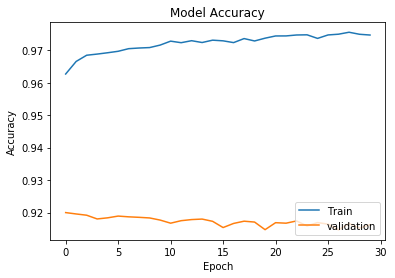

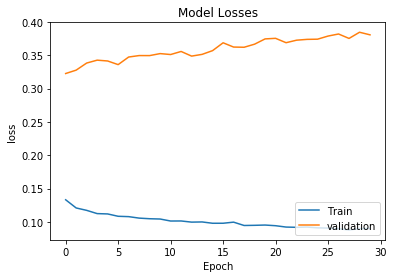

In [59]:
# visualize the accuracy
plt.figure()
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model Final Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

plt.figure()
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Model Final Losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'], loc = 'lower right')

In [63]:
score, acc = model6.evaluate(x_test, test_target, verbose=0)
print('The testing accuracy is:', round(acc*100,2))

Val accuracy: 91.63
